# Data Definition:
- This is a Brazilian E-commerce public dataset of orders made at Olist Store available at Kaggle. 
- The dataset contains  information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.
- An order might have multiple items and each item might be fulfilled by a distinct seller.

# Importing librarires and Loading the Datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
import urllib
import json
import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

customers = pd.read_csv("olist_customers_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payment =pd.read_csv("olist_order_payments_dataset.csv")
reviews=pd.read_csv("olist_order_reviews_dataset.csv")
orders=pd.read_csv("olist_orders_dataset.csv")
products =pd.read_csv("olist_products_dataset.csv")
sellers=pd.read_csv("olist_sellers_dataset.csv")
categories=pd.read_csv("product_category_name_translation.csv")

## Data Preprocessing

In [2]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers.customer_state.value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [5]:
customers.customer_state.nunique()

27

####  P.S. For the customer dataframe: There are no missing values and customer_unique_id is the unique identifier of a customer. However, customer_id is the key to the orders dataset. Each order has a unique customer_id.

In [6]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [10]:
payment.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [11]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [13]:
reviews.review_score.value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [14]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
products.product_category_name.nunique()

73

In [19]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [20]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [21]:
categories.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [22]:
categories.product_category_name.nunique()

71

In [23]:
customers.drop('customer_zip_code_prefix' , axis = 1,inplace = True)

In [24]:
sellers.drop('seller_zip_code_prefix' , axis = 1 ,inplace = True)

### Data Analysis

### Joining The tables

In [25]:
products = pd.merge(products, categories, on='product_category_name', how='left')
# Delete 'product_category_name' column
del products['product_category_name']
# Delete  the categories_df dataframe
del categories
# Rename the column
products.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

In [26]:
df = pd.merge(orders, customers, on='customer_id')
df = df.merge(items, on='order_id')
df = df.merge(payment, on='order_id')
df = df.merge(products, on='product_id')
df = df.merge(sellers, on='seller_id')
df = df.merge(reviews, on='order_id')
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,product_width_cm,product_category,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,13.0,housewares,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,13.0,housewares,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,13.0,housewares,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


### Fixing wrong datatypes

In [27]:
df[['order_purchase_timestamp','order_approved_at' , 'order_delivered_customer_date' , 'order_estimated_delivery_date' ,
       'shipping_limit_date']] = df [['order_purchase_timestamp','order_approved_at' , 
                                              'order_delivered_customer_date' , 'order_estimated_delivery_date',
                                              'shipping_limit_date']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [28]:
top_categories = df[['product_category', 'order_item_id']]
top_categories = top_categories.groupby(['product_category']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories[:10]

,product_category,order_item_id
0,bed_bath_table,14608
1,furniture_decor,12038
2,health_beauty,11368
3,sports_leisure,10273
4,computers_accessories,10222
5,housewares,9503
6,watches_gifts,6765
7,garden_tools,6104
8,telephony,5318
9,auto,4826


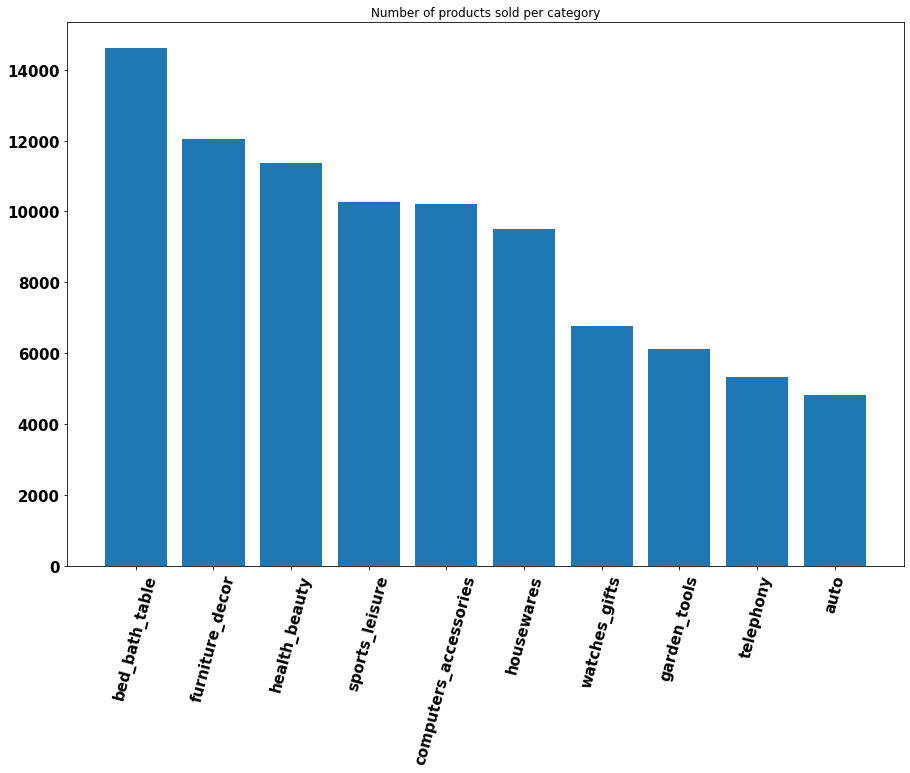

In [29]:
plt.figure(figsize=(15,10))
plt.bar(top_categories['product_category'][:10], top_categories['order_item_id'][:10])
plt.title('Number of products sold per category')
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

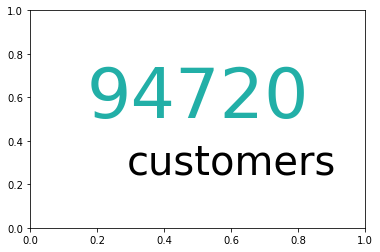

In [30]:
total_cus = df['customer_unique_id'].nunique()
plt.text(0.5, 0.6, total_cus, fontsize = 70 ,ha="center", va="center", color = '#22afa7');
plt.text(0.6, 0.3, 'customers', fontsize = 40 , ha="center", va="center");


array([2016, 2017, 2018], dtype=int64)

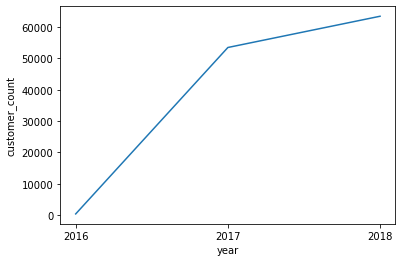

In [31]:
df1 =  df[['order_purchase_timestamp', 'customer_unique_id']].copy()
# extract years from timestamp
df1['year'] = df1['order_purchase_timestamp'].dt.year
# group counts of customers by year
df1 = df1.groupby('year',as_index = False)['customer_unique_id'].count()
#plotting line chart
sns.lineplot( data= df1, x = "year" , y= 'customer_unique_id');
# x ticks
ticks = df1['year'].unique()
plt.xticks(ticks)
plt.ylabel('customer_count')
ticks

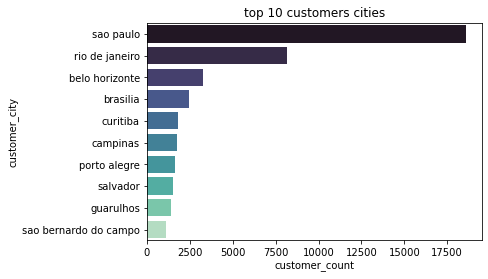

In [32]:
freq = df.customer_city.value_counts()[0:10]
# Get the indexes of the Series
city_order = freq.index
#plot a count plot using seaborn
sns.countplot(data = df , y= 'customer_city' ,  order = city_order , palette= 'mako');
#plot title 
plt.title("top 10 customers cities");
plt.xlabel('customer_count');


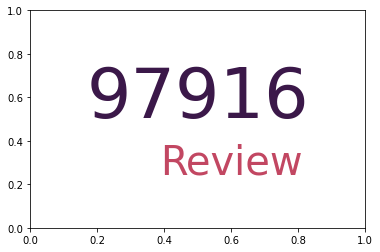

In [33]:
total_reviews = df['order_id'].nunique()
plt.text(0.5, 0.6, total_reviews, fontsize = 70 ,ha="center", va="center", color = '#3B1849');
plt.text(0.6, 0.3, 'Review', fontsize = 40 , ha="center", va="center",color ='#C24762');


Text(0.5, 1.0, 'reviews score')

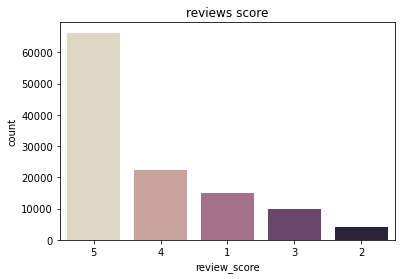

In [34]:
freq = df.review_score.value_counts()
# Get the indexes of the Series
reviews_order = freq.index
#plot a count plot using seaborn
sns.countplot(data= df , x ="review_score", order=reviews_order,  palette = "ch:s=-.2,r=.6");
#plot title 
plt.title("reviews score")

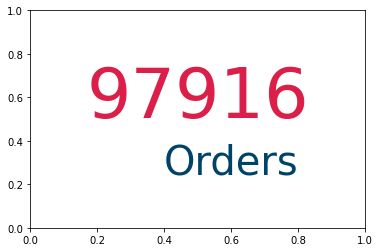

In [35]:
total_orders = df['order_id'].nunique()
plt.text(0.5, 0.6, total_orders, fontsize = 70 ,ha="center", va="center", color = '#DB1F48');
plt.text(0.6, 0.3, 'Orders', fontsize = 40 , ha="center", va="center", color = '#004369');

C:\Users\Omar Eshak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


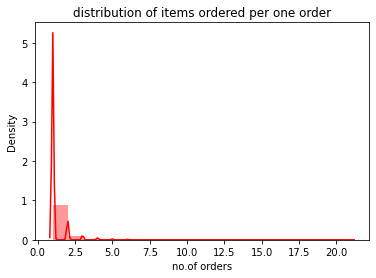

In [36]:
#set bin edges start and end
bin_edges = np.arange(1, df['order_item_id'].max()+1, 1)
#plot histogram 
sns.distplot(df['order_item_id'], bins = bin_edges, color = 'red');
plt.title("distribution of items ordered per one order");
plt.xlabel("no.of orders");

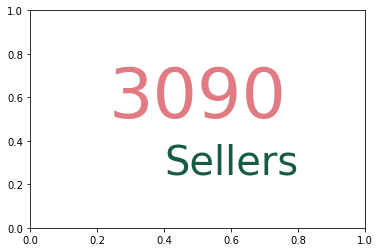

In [37]:
count_seller = df['seller_id'].nunique()
plt.text(0.5, 0.6, count_seller, fontsize = 70 ,ha="center", va="center", color = '#E17A82');
plt.text(0.6, 0.3, 'Sellers', fontsize = 40 , ha="center", va="center", color='#165C40');

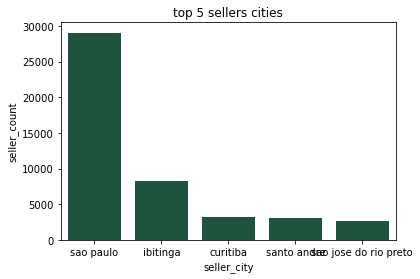

In [38]:
freq = df.seller_city.value_counts()[0:5]
# Get the indexes of the Series
city_order = freq.index
#plot a count plot using seaborn
sns.countplot(data = df , x= 'seller_city' ,  order = city_order , color= '#165C40');
#plot title 
plt.title("top 5 sellers cities");
plt.ylabel('seller_count');
#plt.xticklabels(labels= freq.index,rotation=10);


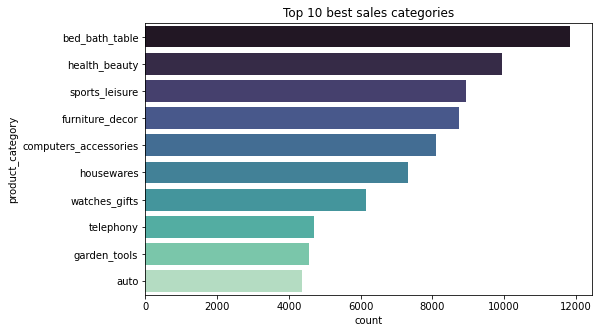

In [39]:
plt.figure(figsize=(8,5))
freq = df.product_category.value_counts()[0:10]
# Get the indexes of the Series
product_order = freq.index
sns.countplot(data = df , y= 'product_category' ,  order = product_order , palette= 'mako');
plt.title("Top 10 best sales categories");

In [63]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [64]:
hopkins(df)

ValueError: could not convert string to float: 'e481f51cbdc54678b7cc49136f2d6af7'

## RFM Calculations

In [40]:
df3= df.copy()

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116094 non-null  object        
 6   order_delivered_customer_date  114858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   customer_unique_id             117329 non-null  object        
 9   customer_city                  117329 non-null  object        
 10  customer_state                 117329 non-null  object        
 11  

In [42]:

#max_date = max(df3['order_purchase_timestamp']) + pd.to_timedelta(1, 'D')
max_date = max(df3['order_purchase_timestamp']) + datetime.timedelta(days=1)


# Calculate Recency, Frequency and Monetary value for each customer 
RFM_data = df3.groupby(['customer_unique_id'],as_index=False).agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'})


# Rename the columns 
RFM_data.rename(columns={'order_purchase_timestamp': 'Recency',
                         'order_id': 'Frequency',
                         'payment_value': 'MonetaryValue'}, inplace=True)

In [43]:
RFM_data.head()

,customer_unique_id,Recency,Frequency,MonetaryValue
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


In [44]:
RFM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94720 entries, 0 to 94719
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  94720 non-null  object 
 1   Recency             94720 non-null  int64  
 2   Frequency           94720 non-null  int64  
 3   MonetaryValue       94720 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


In [45]:
RFM_data. describe()

,Recency,Frequency,MonetaryValue
count,94720.000000,94720.000000,94720.000000
mean,243.437817,1.238693,213.132693
std,153.163707,0.849490,630.134487
min,1.000000,1.000000,9.590000
25%,119.000000,1.000000,63.900000
50%,224.000000,1.000000,113.150000
75%,353.000000,1.000000,202.965000
max,729.000000,75.000000,109312.640000


C:\Users\Omar Eshak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Omar Eshak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Omar Eshak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

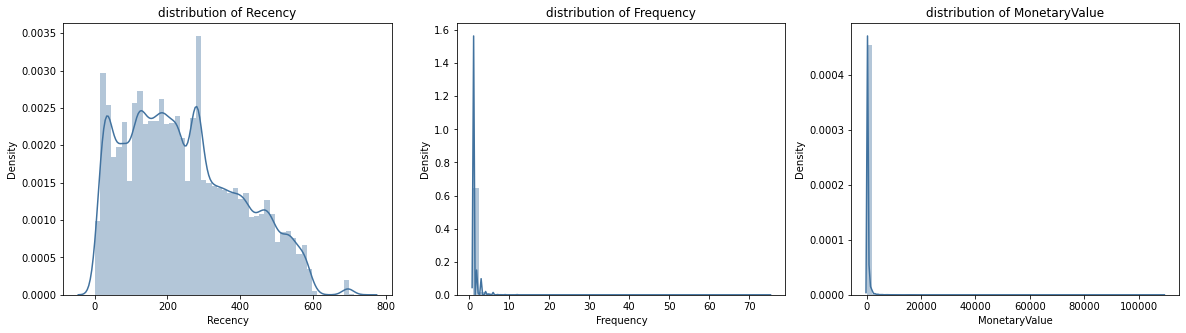

In [46]:
#plotting subplots and figure size
figure, tile = plt.subplots(1, 3,figsize =(20, 5));
 
sns.distplot(RFM_data['Recency'] ,color = '#41729F', ax = tile[0]);
tile[0].set_title("distribution of Recency");



sns.distplot(RFM_data['Frequency'],  color = '#41729F',ax = tile[1]);
tile[1].set_title("distribution of Frequency");



sns.distplot(RFM_data['MonetaryValue'],  color = '#41729F',ax = tile[2]);
tile[2].set_title("distribution of MonetaryValue");

In [47]:
RFM_data['recency_log'] = np.log(RFM_data['Recency'])
RFM_data['freq_log'] = np.log(RFM_data['Frequency'])
RFM_data['monetary_log'] = np.log(RFM_data['MonetaryValue'])

C:\Users\Omar Eshak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Omar Eshak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Omar Eshak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

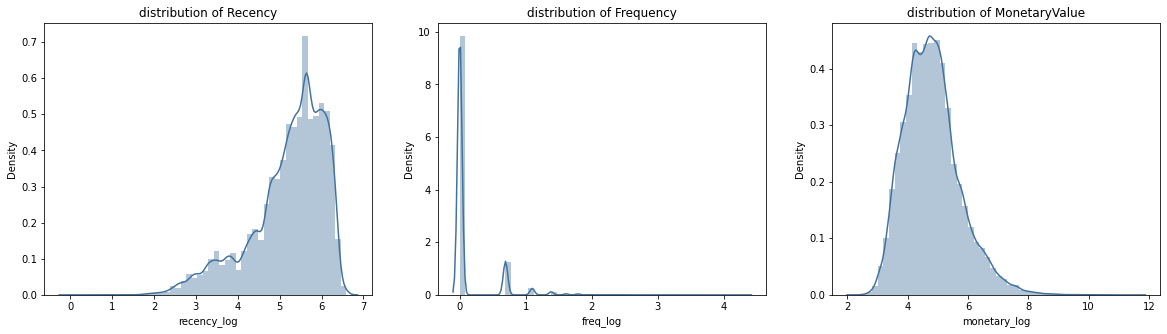

In [48]:
#plotting subplots and figure size
figure, tile = plt.subplots(1, 3,figsize =(20, 5));
 
sns.distplot(RFM_data['recency_log'] ,color = '#41729F', ax = tile[0]);
tile[0].set_title("distribution of Recency");



sns.distplot(RFM_data['freq_log'],  color = '#41729F',ax = tile[1]);
tile[1].set_title("distribution of Frequency");



sns.distplot(RFM_data['monetary_log'],  color = '#41729F',ax = tile[2]);
tile[2].set_title("distribution of MonetaryValue");

In [49]:
log_data = RFM_data[['recency_log','freq_log','monetary_log','customer_unique_id']].copy()

col_names = ['recency_log', 'freq_log','monetary_log']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(log_data[col_names])
                                   
scaled_data = pd.DataFrame(scaled_data, columns = col_names)
scaled_data.head()

,recency_log,freq_log,monetary_log
0,-0.511513,-0.386928,0.165046
1,-0.482616,-0.386928,-1.635992
2,1.233282,-0.386928,-0.378032
3,0.657935,-0.386928,-1.120768
4,0.537149,-0.386928,0.522058


In [50]:
log_data.head()

,recency_log,freq_log,monetary_log,customer_unique_id
0,4.753590,0.0,4.955123,0000366f3b9a7992bf8c76cfdf3221e2
1,4.779123,0.0,3.302849,0000b849f77a49e4a4ce2b2a4ca5be3f
2,6.295266,0.0,4.456902,0000f46a3911fa3c0805444483337064
3,5.786897,0.0,3.775516,0000f6ccb0745a6a4b88665a16c9f078
4,5.680173,0.0,5.282645,0004aac84e0df4da2b147fca70cf8255


In [51]:
log_data = log_data.drop(columns=col_names ,axis=1)
df_norm = log_data.merge(scaled_data , how="left", left_index=True,  right_index=True)

In [52]:
df_norm.head()

,customer_unique_id,recency_log,freq_log,monetary_log
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.511513,-0.386928,0.165046
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.482616,-0.386928,-1.635992
2,0000f46a3911fa3c0805444483337064,1.233282,-0.386928,-0.378032
3,0000f6ccb0745a6a4b88665a16c9f078,0.657935,-0.386928,-1.120768
4,0004aac84e0df4da2b147fca70cf8255,0.537149,-0.386928,0.522058


C:\Users\Omar Eshak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Omar Eshak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Omar Eshak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

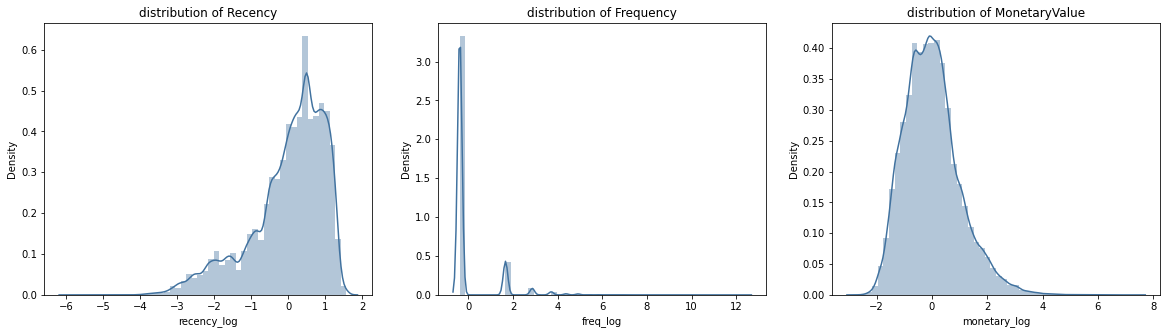

In [53]:
#plotting subplots and figure size
figure, tile = plt.subplots(1, 3,figsize =(20, 5));
 
sns.distplot(df_norm['recency_log'] ,color = '#41729F', ax = tile[0]);
tile[0].set_title("distribution of Recency");



sns.distplot(df_norm['freq_log'],  color = '#41729F',ax = tile[1]);
tile[1].set_title("distribution of Frequency");



sns.distplot(df_norm['monetary_log'],  color = '#41729F',ax = tile[2]);
tile[2].set_title("distribution of MonetaryValue");

## KMeans algorithm

## Elbow method

In [54]:
error_value = {}

# Fit KMeans and calculate erorr for each k
for k in range(1,11):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters= k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(df_norm[col_names])
    
    # Assign sum of squared distances to k element of dictionary
    error_value[k] = kmeans.inertia_
error_value

{1: 284160.0000000014,
 2: 187126.35090307292,
 3: 130706.78984747324,
 4: 99351.18195198353,
 5: 86075.87807036594,
 6: 75549.5773833013,
 7: 66721.99094648812,
 8: 60228.91928545834,
 9: 54349.205902658745,
 10: 49554.810651422966}

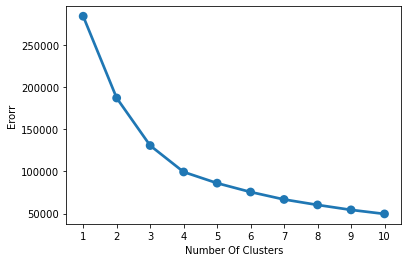

In [55]:
plt.xlabel('Number Of Clusters')
plt.ylabel('Erorr')

# Plot Error values for each key in the dictionary
sns.pointplot(x=list(error_value.keys()), y=list(error_value.values()))

plt.show()

## According to chart we will use 5 clusters
## 5 clusters

In [56]:
# Initialize KMeans
kmeans = KMeans (n_clusters=5, random_state=1) 

# Fit k-means clustering on the normalized data set
label = kmeans.fit(df_norm [col_names])

# Extract cluster labels
cluster_labels = kmeans.labels_

In [57]:
data_rfm_k5 = df_norm.assign(Cluster = cluster_labels)

In [58]:
data_rfm_k5.head()

,customer_unique_id,recency_log,freq_log,monetary_log,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.511513,-0.386928,0.165046,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.482616,-0.386928,-1.635992,4
2,0000f46a3911fa3c0805444483337064,1.233282,-0.386928,-0.378032,4
3,0000f6ccb0745a6a4b88665a16c9f078,0.657935,-0.386928,-1.120768,4
4,0004aac84e0df4da2b147fca70cf8255,0.537149,-0.386928,0.522058,1


In [59]:
result_5clusters = pd.merge(RFM_data,data_rfm_k5[['Cluster','customer_unique_id']], how='outer', on ='customer_unique_id')

In [60]:
result_5clusters.head()

,customer_unique_id,Recency,Frequency,MonetaryValue,recency_log,freq_log,monetary_log,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4.753590,0.0,4.955123,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4.779123,0.0,3.302849,4
2,0000f46a3911fa3c0805444483337064,542,1,86.22,6.295266,0.0,4.456902,4
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,5.786897,0.0,3.775516,4
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,5.680173,0.0,5.282645,1


In [61]:
groupe = result_5clusters.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
groupe.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'customer_unique_id': 'count'}).round(1)

,Recency,Frequency,MonetaryValue,customer_unique_id
Cluster,,,,
0,48.1,1.0,135.2,16045
1,282.1,1.0,274.1,28387
2,257.7,2.1,316.1,10492
3,237.3,4.4,1487.9,3065
4,295.3,1.0,64.3,36731


In [62]:
result_5clusters['Cluster'].value_counts(normalize=True) * 100

4    38.778505
1    29.969383
0    16.939400
2    11.076858
3     3.235853
Name: Cluster, dtype: float64

## Conclusion:

### 17% - cluster 0 with largest recency and smallest monetary value: About to Sleep.
These are customers who haven't bought in a long time, but may still buy again.

CRM Strategy:
Offer discounts;
Recommendation of popular products.

### 30% - cluster 1 with intermediate recency, largest frequency and largest monetaryvalue: Loyal Customers.
These are customers who have bought recently, buy often, and spend a lot.

CRM Strategy:
Personalized communication;
Offer few products, but present products that they are likely to be interested in;
Special offers, products and discounts for these customers so they feel valued;
Ask for reviews and feedbacks constantly;
Avoid sending massive amounts of offers;
Give rewards.

### 11% - cluster 2 with large recency, small frequency and small monetaryvalue: At Risk.
These are customers who have bought a long time ago, only a few times and have spent little

CRM Strategy:
Standard communication for sending offers;
Offer relevant products and good deals.

### 3% - cluster 3 with the smallest recency but did not spend much money: Customer Needing Attetion.
These are customers who have recently purchased, however are still in doubt whether they will make their next purchase from the company or a competitor.

CRM Strategy:
Promotional campaigns for a limited time;
Product recommendations based on their behavior;
Show the importance of buying with the company.

### 39% - cluster 4 with intermediate recency and intermediate frequency and intermediate monetaryvalue: Potential Loyallist.
These are recent buyers, spend a good amount and have bought more than once.

CRM Strategy:

Offer a loyalty program;
Keep them engaged;
Personalized and other product recommendations.